<h1>Projeto 1 - Ciência dos Dados</h1>


**Nome:**
Marcelo Lisboa de Castro Reis - Engenharia 2C

**Introdução:**

Para o Projeto 1 de Ciência dos Dados foi verificado o banco de dados do site Gapminder 
em busca de indicadores que estivessem relacionados com o IDH (Índice de Desenvolvimento 
Humano em cada país), mas que não fazem parte de sua formulação original.

O ano base escolhido para a análise foi 2004 e os índices considerados foram:
- Proporção da população utilizando instalações melhoradas de saneamento básico
- Latitude, ou seja, localização geográfica (how far from the poles)

**Minha Pergunta:** 
<h3> Como será que a localização geográfica de um país no globo e o seu saneamento básico se 
relacionam, incentivando ou não, o IDH desse país? </h3>


Um dos fatores que fez com que essas variáveis específicas fossem escolhidas foi a curiosidade 
e o interesse em verificar se certas teorias, que certificam que os países mais frios são de maneira geral mais desenvolvidos que os quentes, realmente fazem sentido. Outro é descobrir se
isso também interfere diretamente na infraestrutura, saúde e higiene de um determinado país. 

Assim, a partir desse questionamento, foi feito um estudo aprofundado de análise exploratória de dados que nos ajudarão, ou não, a identificar padrões para formular conclusões.

*Inicialização:*
Importar, ler e organizar os dados em um DataFrame (tabela) que será utilizada durante o estudo:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Leitura dos arquivos em Excel
idh = pd.read_excel('Indicator_HDI.xlsx')
saneamento = pd.read_excel('Indicator_Improved sanitation total percent.xlsx')
latitude = pd.read_excel('indicator latitude.xlsx')

In [3]:
#Arquivo IDH
idh_2004 = idh.loc[:,['geo', 2004]]
idh_2004 = idh_2004.rename(index = str, columns={'geo':'Países', 2004:"IDH"})
idh_2004 = idh_2004.set_index('Países')
idh_2004.head()

#Saneamento Básico
saneamento_valores = saneamento.iloc[:,[0,15]]
saneamento_valores.columns = ['Países', 'Acesso Saneamento (%)']
saneamento_valores = saneamento_valores.set_index('Países')

#Latitude
lat = latitude.dropna(how='any').rename(index=str, columns={1900:'Latitude (°)'})
lat = lat.iloc[:,1]

#DataFrame com junçõa dos índices
idh_sanea = idh_2004.join(saneamento_valores)
idh_lat_sanea = idh_sanea.join(lat)
ils = idh_lat_sanea.dropna(how='any')
ils.head()

,IDH,Acesso Saneamento (%),Latitude (°)
Países,,,
Afghanistan,0.396,34.0,34.565
Albania,0.685,88.0,41.312
Algeria,0.680,93.0,36.720
Angola,0.426,49.0,-8.843
Argentina,0.780,90.0,-36.676


Com a tabela pronta, partimos para uma primeira análise, em que serão plotados gráficos de dispersão com uma linha de tendência que terá o melhor ajuste para um conjunto de dados tentando minimizar a soma dos quadrados das diferenças entre o valor estimado e os dados observados (calculada a partir do Método dos Mínimos Múltiplos Quadrados):

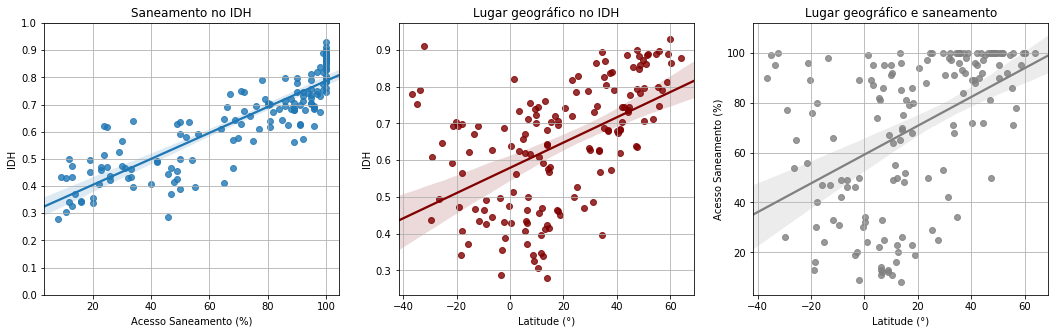

Correlação dos gráficos:


,IDH,Acesso Saneamento (%),Latitude (°)
IDH,1.000000,0.874085,0.509597
Acesso Saneamento (%),0.874085,1.000000,0.466736
Latitude (°),0.509597,0.466736,1.000000


In [4]:
fig=plt.figure(figsize=(18,5))

plt.subplot(131)
plt.title('Saneamento no IDH')
sns.regplot(ils["Acesso Saneamento (%)"],ils["IDH"])
plt.xlabel("Acesso Saneamento (%)");plt.ylabel("IDH")
plt.yticks(np.arange(0,1.1,.1))
plt.grid()

plt.subplot(132)
plt.title('Lugar geográfico no IDH')
sns.regplot(ils["Latitude (°)"],ils["IDH"],color=("maroon"))
plt.xlabel("Latitude (°)");plt.ylabel("IDH")
plt.grid()

plt.subplot(133)
plt.title('Lugar geográfico e saneamento')
sns.regplot(ils["Latitude (°)"],ils["Acesso Saneamento (%)"],color=("grey"))
plt.xlabel("Latitude (°)");plt.ylabel("Acesso Saneamento (%)")
plt.grid()

plt.show()

print('Correlação dos gráficos:')
ils.corr()

Com esses gráficos já foi possível perceber que quanto maior o IDH, maior é o acesso a saneamento básico em um país. Para determinar a força da associação entre os fatores, foi calculado o valor do coeficiente de correlação de Pearson, que mostra existir uma correlação positiva e muito alta entre ambos.

Já em relação ao IDH e a Latitude e à latitude e o saneamento, o coeficiente de correlaçao de Pearson mostra que há uma associação moderada entre os termos. Contudo, foi possível visualizar certos padrões: no gráfico "Lugar geográfico no IDH", foi possível ver que países mais ao norte tem um Índice de Desenvolvimento relativamente alto, enquanto que os países próximos à Linha do Equador tem IDHs médios e baixos. Por fim no terceiro gráfico "Lugar geográfico e saneamento", parece que em ambas as pontas há vários países com alto acesso ao saneamento, e poucos países com baixo.

Plotando agora um único gráfico que contém diversas análises (como gráficos de disperção e histogramas, em que as cores representam o IDH de cada país) já é possível visualizar uma relação entre as cores (IDH), o acesso ao sanemanto que esse país possui e em que latitude ele está:

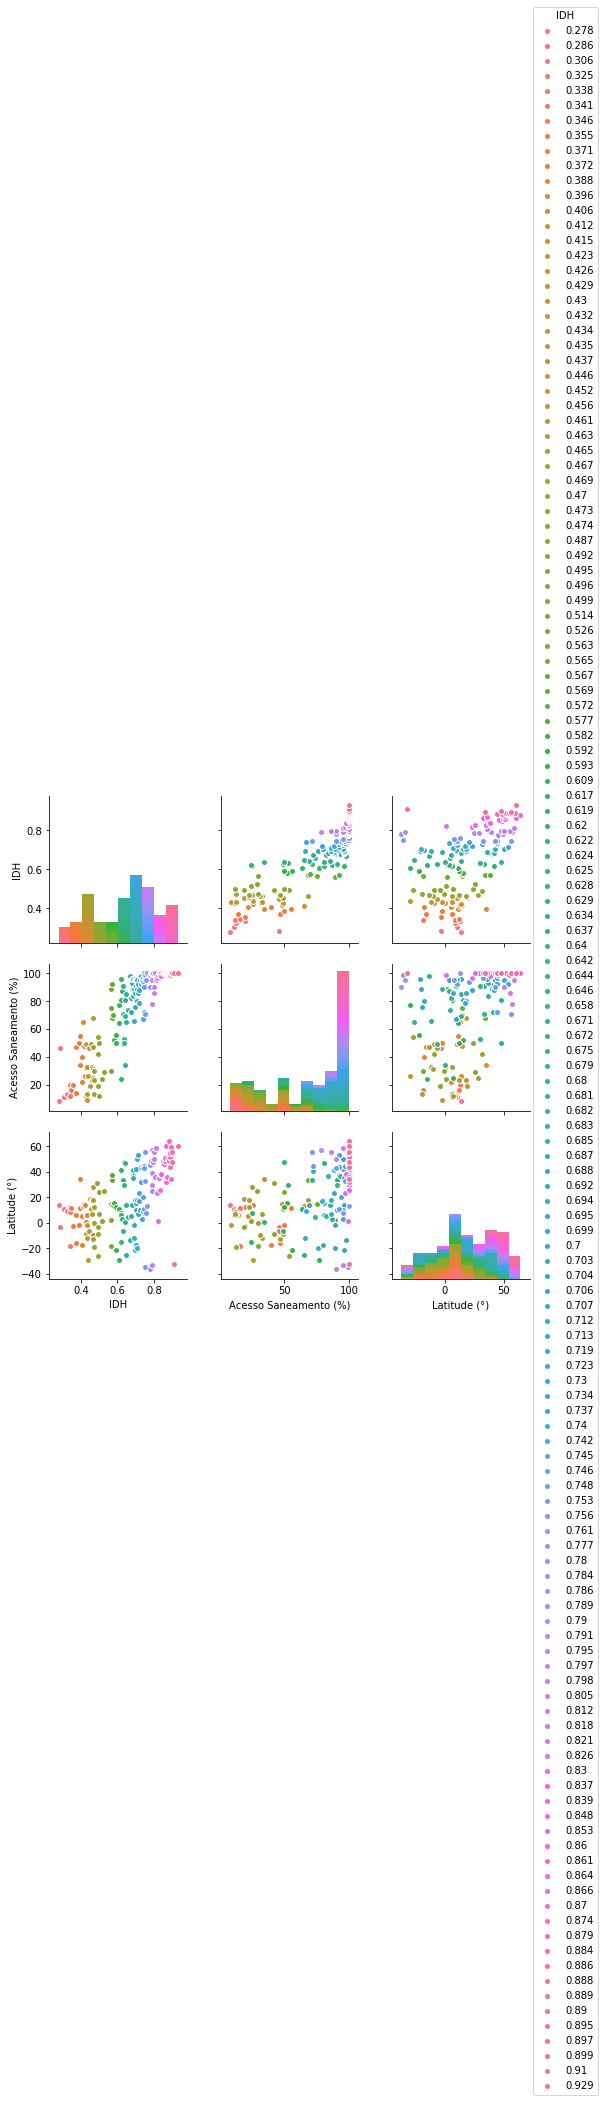

In [7]:
sns.pairplot(ils, hue='IDH')

# Aprofundamento da análise e algumas conclusões prévias:

Para aprofundar a nossa análise, foi dividido o estudo em duas partes (espaço geográfico e saneamento), buscando no final encontrar alguma associação entre ambas.

<h4>Saneamento Básico: </h4> 

Relembrando o que observamos anteriormente nos gráficos de dispersão, vamos analizar o saneamento:

count    155.000000
mean      69.677419
std       30.596650
min        8.000000
25%       46.500000
50%       81.000000
75%       97.000000
max      100.000000
Name: Acesso Saneamento (%), dtype: float64

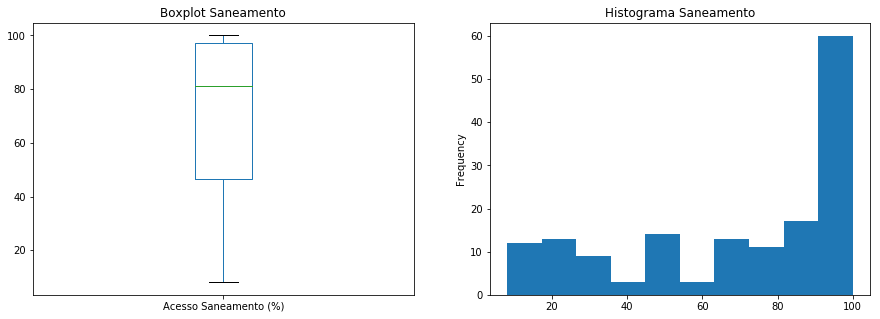

In [5]:
fig = plt.figure(figsize=(15,5))
plt.subplot(121)
ils['Acesso Saneamento (%)'].plot.box(title='Boxplot Saneamento')
plt.subplot(122)
ils['Acesso Saneamento (%)'].plot.hist(title='Histograma Saneamento')

ils['Acesso Saneamento (%)'].describe()

Observando o gráfico boxplot e o histograma, podemos perceber que a mediana esta próxima aos 80% subindo bastante em relação ao valor média. Sendo assim, existe assimetria à esquerda neste histograma, com o primeiro quartil (Q1) sendo bem maior que o terceiro (Q3), o que significa que mais da metade dos países tem saneamento maior do que o valor médio de saneamento.

Em seguida, foram criados crosstabs em busca de mais respostas, principalmente sobre como o saneamento é distribuido pelos países. Cada um dos índices foi dividido em várias faixas (formando um gráfico de barras) para tentar ver como os eles melhor se relacionam entre si. 

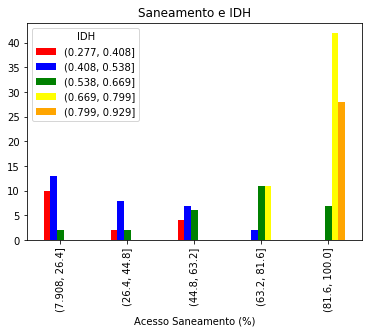

In [6]:
# Divisão para o sanemaneto e lat:
faixa_saneamento = pd.cut(ils["Acesso Saneamento (%)"], bins=5)
faixas_IDH = pd.cut(ils["IDH"] , bins=5)
faixa_lat = pd.cut(ils["Latitude (°)"], bins=8)
#Crosstabs
FaixaLat = pd.crosstab(faixa_lat, faixas_IDH)
FaixaSanea = pd.crosstab(faixa_saneamento, faixas_IDH)
FxLatSan =  pd.crosstab(faixa_lat,faixa_saneamento)
#Gráfico de barras
FaixaSanea.plot(kind='bar', color=('red','blue','green','yellow', 'orange'), title="Saneamento e IDH")

Como dito previamente, quanto maior o IDH, maior o acesso ao saneamento; e quanto menor o IDH, menor o saneamento. Ou seja, é estabelecida uma relação direta entre os dois! 

Agora, sobre o lugar geográfico e o saneamento...

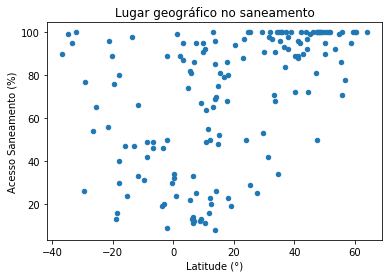

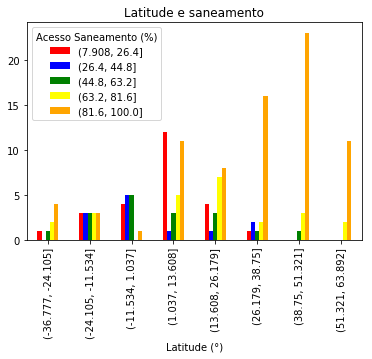

In [7]:
#Relação entre Latitude e Saneamento
ils.plot.scatter(title='Lugar geográfico no saneamento', y='Acesso Saneamento (%)', x='Latitude (°)')
FxLatSan.plot(kind='bar', color=('red','blue','green','yellow', 'orange',), title="Latitude e saneamento")
#FxLatSan.plot(kind='bar', color=('red','pink','salmon','blue','green','yellow', 'orange',), title="Latitude e saneamento")

Realmente é possível constatar que o acesso ao saneamento pela população é muito maior em áreas mais próximas ao pólo norte. Enquanto porcentagens altas vão caindo na medida que nos afastamos do pólo norte, as porcentagens baixas vão crescendo até atingir seu ápice na latitude 0° (Linha do Equador). Contudo, nota-se também que na medida em que nos aproximamos do pólo sul vai acontecendo a mesma coisao mesmo padrão que o ocorrido no pólo norte mas em proporções bem menores.

<h4>Espaço geográfico: </h4> 

Agora em relação ao espaço geográfico dos países, eles foram separados em três diferentes faixas. Essas faixas vão se basear nas latitudes das zonas climáticas, ou seja, na Zona Tropical que fica entre os trópicos (aproximadamente 25°N e 25°S), na Zona Temperada do Norte que fica acima do Trópico de Câncer e na Zona Temperada do Sul que fica abaixo do Trópico de Capricórnio.

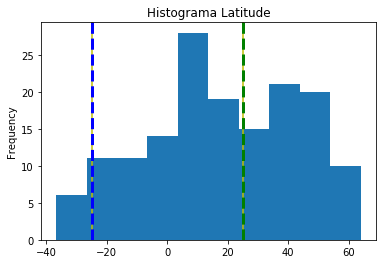

In [8]:
ils['Latitude (°)'].plot.hist(title='Histograma Latitude')
plt.axvline(25, color='y')
plt.axvline(25, color='g', linestyle='dashed', linewidth=3)
plt.axvline(-25, color='y')
plt.axvline(-25, color='b', linestyle='dashed', linewidth=3)

Sem considerar as marcações feitas, podemos dizer que o histograma é, de certa forma, simétrico. Contudo, considerando as linhas delimitadas, pode-se perceber a partir desse histograma que há um número muito inferior de países localizados na Zona Temperada do Sul (ZTS) em relação à Zona Temperada do Norte (ZTN). Uma possível razão é que há muito mais terra no hemisfério norte do que no hemisfério sul, ou seja, os países da ZTS vão apenas até a latitude de aproximadamente 37°S, enquanto que os da ZTN vão até 64°N.

Serão plotados em seguida para cada uma das zonas, gráficos de dispersão com linha de tendência:

As diferentes zonas baseadas na latitude:


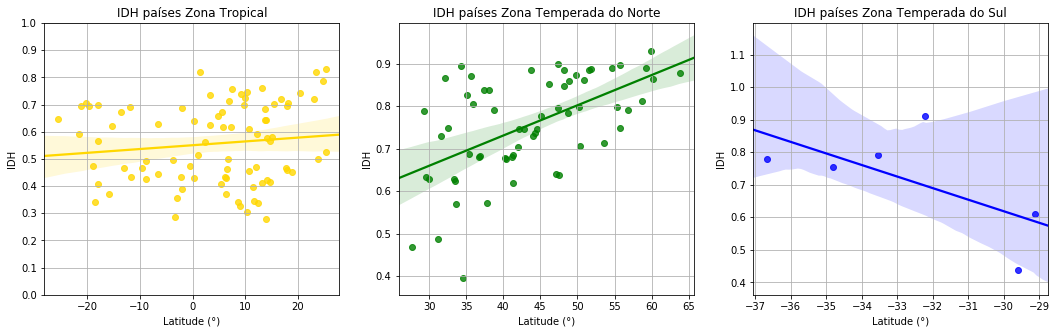

In [27]:
lat_temp = ils[(ils['Latitude (°)']>=-26) & (ils['Latitude (°)']<=26)]
lat_tropN = ils[ils['Latitude (°)']>27]
lat_tropS = ils[ils['Latitude (°)']<-27]
#-------------------------------
print('As diferentes zonas baseadas na latitude:')

fig=plt.figure(figsize=(18,5))

plt.subplot(131)
plt.title('IDH países Zona Tropical')
sns.regplot(lat_temp["Latitude (°)"],lat_temp["IDH"],color=("gold"))
plt.xlabel("Latitude (°)");plt.ylabel("IDH")
plt.yticks(np.arange(0,1.1,.1))
plt.grid()

plt.subplot(132)
plt.title('IDH países Zona Temperada do Norte')
sns.regplot(lat_tropN["Latitude (°)"],lat_tropN["IDH"],color=("green"))
plt.xlabel("Latitude (°)");plt.ylabel("IDH")
plt.grid()

plt.subplot(133)
plt.title('IDH países Zona Temperada do Sul')
sns.regplot(lat_tropS["Latitude (°)"],lat_tropS["IDH"],color=("blue"))
plt.xlabel("Latitude (°)");plt.ylabel("IDH")
plt.grid()

plt.show()

A partir desses gráficos consegue-se visualizar que as diferentes regiões e seus respectivos climas também afetam no desenvolvimento dos países. Como apresentado nos gráficos, nações em regiões tropicais (ZT) tendem a ter temperaturas mais elevadas que as nações localizadas nas zonas temperadas. Também é possível notar que (como já afirmado) a maioria dos países pobres e com baixo e médio desenvolvimento encontram-se nessa zona tropical. 
Em contraste, a maioria dos países mais ricos encontram-se nas zonas temperadas (ZTN e ZTS) e ao se afastarem da ZT vão ficando mais “desenvolvidos”.

Dados ZONA TROPICAL: 
             IDH  Acesso Saneamento (%)  Latitude (°)
count  86.000000              86.000000     86.000000
mean    0.555872              54.767442      3.977342
std     0.146542              30.240866     13.085622
min     0.278000               8.000000    -25.583000
25%     0.432500              25.250000     -3.604250
50%     0.566000              50.000000      6.618500
75%     0.693500              84.250000     13.773750
max     0.830000             100.000000     25.309000 
Correlação:
                            IDH  Acesso Saneamento (%)  Latitude (°)
IDH                    1.000000               0.832944      0.125108
Acesso Saneamento (%)  0.832944               1.000000      0.148849
Latitude (°)           0.125108               0.148849      1.000000


Dados ZONA TEMPERADA NORTE: 
             IDH  Acesso Saneamento (%)  Latitude (°)
count  62.000000              62.000000     62.000000
mean    0.756210              89.500000     43.580261
std     0.

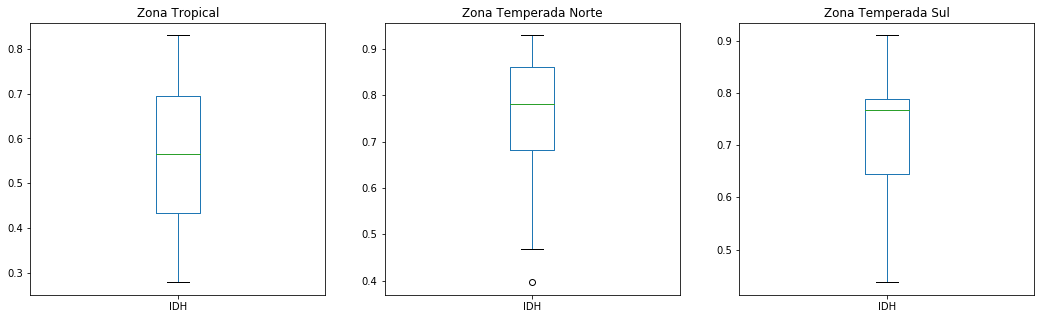

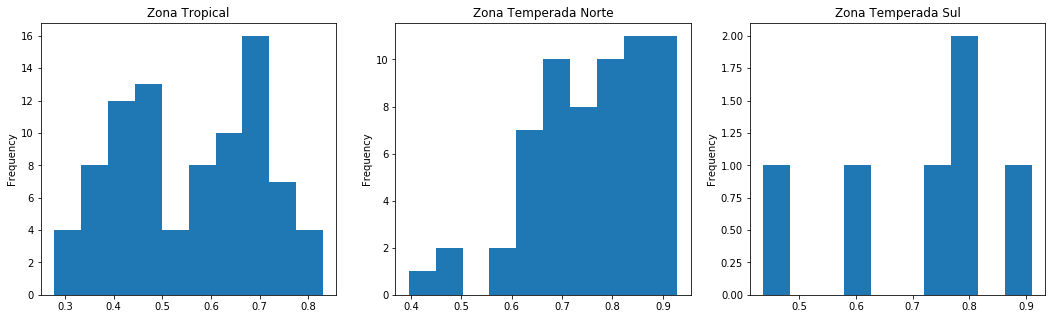

In [36]:
def dados(dados_x, dados_y, dados_z):
    print("Dados ZONA TROPICAL: \n{0} \nCorrelação:\n{1}\n".format(dados_x.describe(), dados_x.corr()))
    print("\nDados ZONA TEMPERADA NORTE: \n{0} \nCorrelação:\n{1}\n".format(dados_y.describe(), dados_y.corr()))
    print("\nDados ZONA TEMPERADA SUL: \n{0} \nCorrelação:\n{1}\n".format(dados_z.describe(), dados_z.corr()))
#------------------------------------------------------------

f= plt.figure(figsize=(18,5))
plt.subplot(132)
lat_tropN['IDH'].plot.box(title='Zona Temperada Norte')

plt.subplot(131)
lat_temp['IDH'].plot.box(title='Zona Tropical')

plt.subplot(133)
lat_tropS['IDH'].plot.box(title='Zona Temperada Sul')

f= plt.figure(figsize=(18,5))

plt.subplot(131)
lat_temp['IDH'].plot.hist(title='Zona Tropical')

plt.subplot(132)
lat_tropN['IDH'].plot.hist(title='Zona Temperada Norte')

plt.subplot(133)
lat_tropS['IDH'].plot.hist(title='Zona Temperada Sul')

dados(lat_temp,lat_tropN, lat_tropS)

Examinando cada uma dessas zonas com os gráficos boxplot, histogramas e suas variáveis quantitativas, percebe-se haver para a Zona Tropical uma proximidade entre a média e a mediana que indica que a variável latitude na zona tropical é simétrica, ou seja, tem igualmente países com baixo e médio Índice de Desenvolvimento (entretanto há um outliar: Cingapura que tem IDH de 0,821 e está na latitude 1,355°N). Já o valor do coeficiente de correlação de Pearson, mostra existir uma correlação baixíssima entre latitude e IDH.

Em relação à Zona Temperada do Norte, a mediana é um pouco maior que a média, mas com uma diferença quase mínima e o valor do coeficiente de correlação mostra existir uma correlação positiva consideravel entre latitude e IDH. Pelo histograma coseguimos ver claramente que é assimétrico e há uma cauda para a esquerda. Há um outliar na ZTN também, o Afeganistão que está razoavelmente longe da ZT (34,565°N) e tem IDH de 0,396.

Por fim, sobre a Zona Temperada do Sul, a mediana é maior do que a média, o que aponta para uma  assimetria à esquerda neste histograma, com o Q1 sendo bem maior que o Q3. A correlação é negativa e também considerável entre a latitude e a zona temperada do sul. Nesse caso não há outliars.

In [11]:
lat_temp.sort_values(by='IDH', ascending=False).head(5) #OUTLIAR = SINGAPURA

,IDH,Acesso Saneamento (%),Latitude (°)
Países,,,
Qatar,0.830,100.0,25.309
Singapore,0.821,99.0,1.355
United Arab Emirates,0.818,97.0,23.390
Bahamas,0.786,100.0,24.700
Barbados,0.761,100.0,13.179


A cidade-estado Cigapura pode ser considerada um outliar por diversas razões. Considerado pelo Banco Munial como o melhor lugar do mundo para se fazer negócios, o país é lider mundial em diversas áreas. É o quarto principal centro financeiro do mundo, o segundo maior mercado de cassinos e o terceiro maior centro de refinação do mundo. Além disso, seu porto é um dos cinco mais movimentoados do mundo.
Outro fator que é extremamente fundamental para esse alto desenvolvimento é o fato de ter uma economia de mercado extremamente liberal, sem burocracia e impedimentos. Impostos baixissimos, incentivos fiscais, politica de tolerancia zero contra a corrupção e desenvolvimento de um ambiente totalmente a favor do mercado que atraem investidores de todo o mundo.

*Qatar não é considerado outliar pois está muito próximo ao trópico de Câncer e consequentemente à ZTN. 

In [12]:
lat_tropN.sort_values(by='IDH').head(5) #OUTLIAR = AFEGANISTAO

,IDH,Acesso Saneamento (%),Latitude (°)
Países,,,
Afghanistan,0.396,34.0,34.565
Nepal,0.469,25.0,27.712
Pakistan,0.487,42.0,31.173
Morocco,0.569,68.0,33.593
Tajikistan,0.572,92.0,37.806


O Afeganistão pode ser considerado um outliar principalmente pois vive uma situação de guerra permanente ha mais de três décadas. Além disso, a falta de um governo eficiente e uma sociedade pouco urbanizada (76% da população vive na área rural), dividida em grupos tribais, não contribui para seu desenvolvimento.

# Análise temporal:
Gráficos de IDH e saneamento no tempo, entre os anos 2004 e 2010, com correlação:

In [82]:
def reta(dados_x, dados_y, correlacao, title):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8, label=correlacao.corr())
    plt.title(title)
    plt.ylabel('IDH')
    plt.xlabel('Latitude (°)')
    plt.legend()
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.tight_layout()
    plt.show()

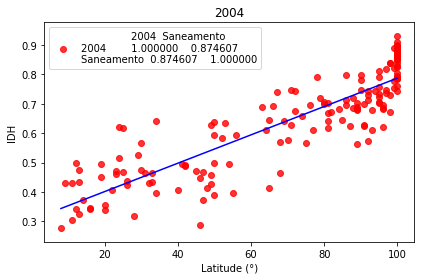

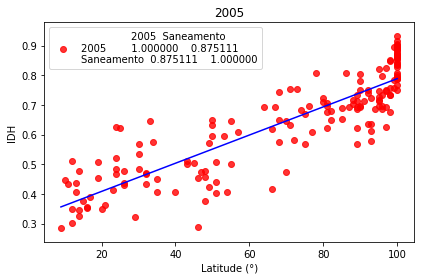

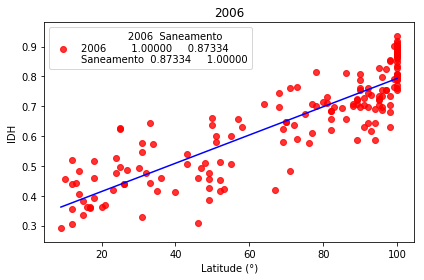

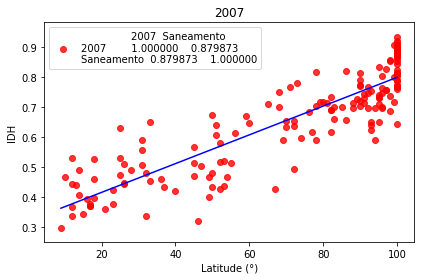

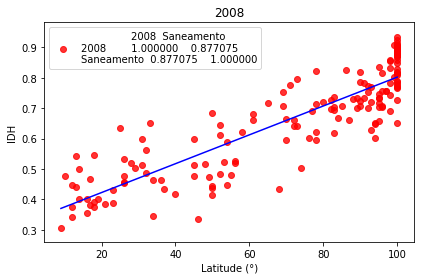

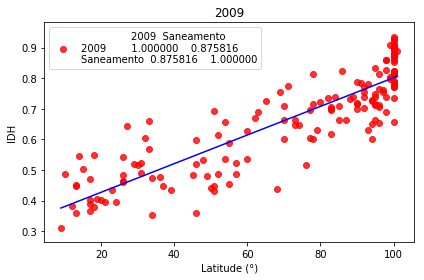

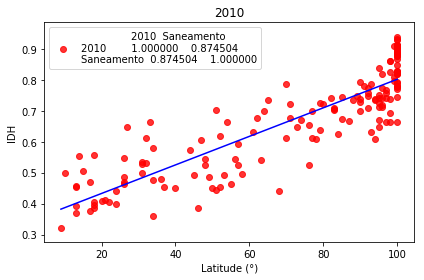

In [83]:
for ano in range(2004, 2011, 1):
    idh_timeline = idh.loc[:,['geo', ano]]
    idh_timeline = idh_timeline.rename(index = str, columns={'geo':'Países'})
    idh_timeline = idh_timeline.set_index('Países')
    idh_timeline
    
    sanea_timeline = saneamento.loc[:,['Proportion of the population using improved sanitation facilities, total',str(ano)]]
    sanea_timeline = sanea_timeline.rename(index = str, columns={'Proportion of the population using improved sanitation facilities, total':'Países', str(ano):'Saneamento'})
    sanea_timeline = sanea_timeline.set_index('Países')
    
    idh_sanea_tm = idh_timeline.join(sanea_timeline)
    i_tm = idh_sanea_tm.dropna(how='any')
    #print (i_tm.head(1))
    
    reta(i_tm['Saneamento'], i_tm[ano], i_tm, ano)
    
#sns.regplot(i_tm["Saneamento"],i_tm[ano])


Gráficos de IDH e latitude no tempo, entre os anos 2004 e 2010, com correlação:

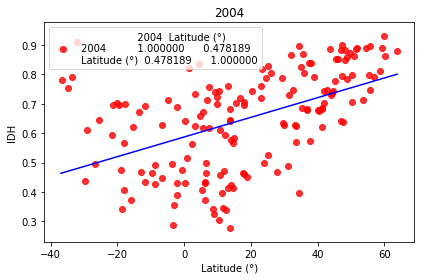

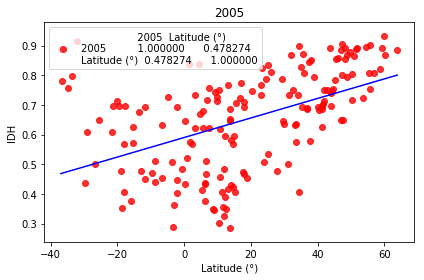

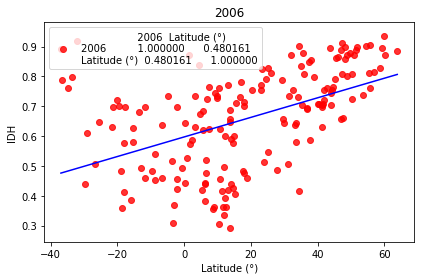

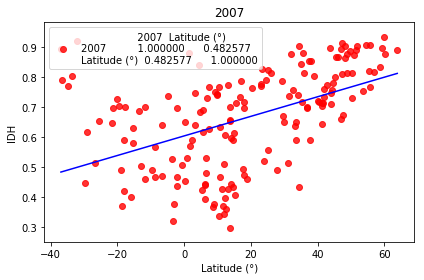

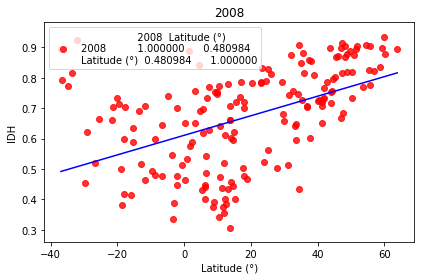

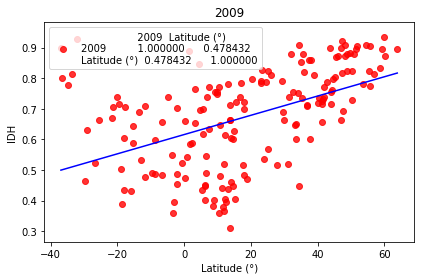

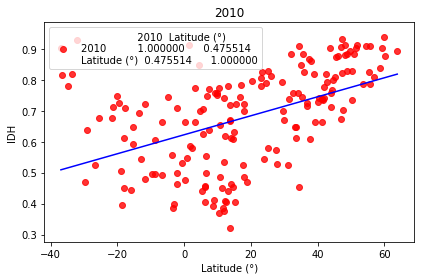

In [84]:
for ano in range(2004, 2011, 1):
    idh_timeline = idh.loc[:,['geo', ano]]
    idh_timeline = idh_timeline.rename(index = str, columns={'geo':'Países'})
    idh_timeline = idh_timeline.set_index('Países')

    idh_lat_tm = idh_timeline.join(lat)
    
    reta(idh_lat_tm['Latitude (°)'], idh_lat_tm[ano], idh_lat_tm, ano)
#sns.regplot(idh_lat_tm["Latitude (°)"],idh_lat_tm[ano])
    

Após plotar diversos gráficos de cada índice durante o tempo, é possível concluir que tanto a variação do IDH pela latitude, como o IDH pelo acesso de saneamento básico, variou muito pouco nos países. A mundança é quase que imperceptivel, só é possível ver-la por causa dos valores da correlação plotados junto ao gráfico.

# Considerações finais / Conclusão:

Depois de finalizar a análise da latitude dos países e seu acesso ao saneamento, foi possível chegar a conclusões.
Nota-se que a grande maioria dos países localizados na ZT têm IDHs de baixo e médio índice, e quanto mais próximos aos pólos, o valor do índice começa a crescer!

Esse fato é visível não só em países, mas também dentro de um mesmo país. As regiões mais ricas estão geralmente situadas na zona temperada. O Brasil é um bom exemplo disso, São Paulo que está localizada próxima ao trópico é muito mais rica e desenvolvida que Salvador.

Portanto, relacionando a aproximação dos pólos com a mudança de temperatura, consequententemente a temperatura vai diminuindo ao se afastar do Equador. 

Temperaturas quentes trazem problemas para os países que convivem com elas, como por exemplo maiores taxas de doenças infecciosas. Doenças que não ocorrem em regiões temperadas devido ao fato de o frio agir naturalmente como controlador da saúde pública. Em outras palavras, o mosquito que a transmite não consegue viver em temperaturas frias. Dengue, Cólera e Malária são três exemplos que tem  a água como relação existente entre elas. Os incidentes crescem em lugares que não tem infraestrutura adequada, como a falta de saneamento básico. Condições como essa contribuem para o excesso de água parada que cria o ambiente ideal para a doença se desenvolver. No Brasil por exemplo, 70% das internações em hospitais se devem a doenças causadas pela má qualidade da água.

Por fim, as regiões tropicais tendem a ser mais rurais do que as regiões temperadas, com suas atividades economicas baseadas no setor pirmário, de baixa tecnologia (agricultura) ao contrário dos países nas zonas temperadas que acabam investindo mais nos setores secundário e terciário (industria, comércio e serviços).

Foram encontrados vários estudos na literatura que sustentam as hipóteses levantadas. O grande economista escocês Adam Smith, por exemplo, publicou em seu livro A Riqueza das Nações que além do liberalismo econômico, outro elemento significativo para o desenvolvimento de um país é o seu lugar geográfico (para ele, o importante era ter ou não acesso ao mar). Já Andrew D. Mellinger, economista do Centro de Desenvolvimento Internacional da Universidade Harvard, em seu artigo “The Geography of Poverty and Wealthy” junta os dados da localização com os do clima. Ele chegou em um resultado similar ao obtido nesta pesquisa, percebendo que a maioria dos países das zonas centrais e mais quentes do globo são mais pobres do que os outros, avantajados por sua localização. De acordo com ele, "We have found strong evidence that geography plays an important role in shaping the distribution of world income and economic growth".

<h4>Referências bibliográficas:</h4>

- (PDF) The Geography of Poverty and Wealth. Available from: https://www.researchgate.net/publication/12096409_The_Geography_of_Poverty_and_Wealth 
- https://super.abril.com.br/cultura/quanto-mais-quente-pior/
- http://hdr.undp.org/en/content/sanitation-and-human-development
- http://jornaldoempreendedor.com.br/destaques/politica-e-economia/o-formidavel-desenvolvimento-de-cingpura/
- https://thewaterproject.org/water-scarcity/cholera-dengue-fever-malaria-water
- https://portalseer.ufba.br/index.php/geotextos/article/viewFile/3028/2132
- http://www.sintaema.org.br/artigo.php/295-saneamento-basico-essencial-para-saude-economia-e-producao.html?cod_conteudo=295-saneamento-basico-essencial-para-saude-economia-e-producao.html.php/295-saneamento-basico-essencial-para-saude-economia-e&tit=producao
